<b>Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Random forests\Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
a = []
for i in data['Taxable.Income']:
    if i <= 30000:
        a.append('Risky')
    else:
        a.append('Good')
a            

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [6]:
data_2 = data.copy()

In [7]:
data_2['Taxable.Income'] = a
data_2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


<B>EDA

In [8]:
data_2.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600,600.000000,600.000000,600
unique,2,3,2,NaN,NaN,2
top,YES,Single,Good,NaN,NaN,YES
freq,312,217,476,NaN,NaN,302
mean,NaN,NaN,NaN,108747.368333,15.558333,NaN
std,NaN,NaN,NaN,49850.075134,8.842147,NaN
min,NaN,NaN,NaN,25779.000000,0.000000,NaN
25%,NaN,NaN,NaN,66966.750000,8.000000,NaN
50%,NaN,NaN,NaN,106493.500000,15.000000,NaN
75%,NaN,NaN,NaN,150114.250000,24.000000,NaN


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [10]:
data_2.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
data.groupby('Undergrad').mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_6628\74708976.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Undergrad').mean()


,Taxable.Income,City.Population,Work.Experience
Undergrad,,,
NO,56550.048611,104621.795139,15.607639
YES,53969.907051,112555.589744,15.512821


In [12]:
data.groupby('Marital.Status').mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_6628\245068259.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Marital.Status').mean()


,Taxable.Income,City.Population,Work.Experience
Marital.Status,,,
Divorced,57606.052910,109109.100529,15.365079
Married,51397.469072,108240.479381,15.984536
Single,56527.059908,108885.474654,15.345622


In [13]:
data.groupby('Urban').mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_6628\297095322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Urban').mean()


,Taxable.Income,City.Population,Work.Experience
Urban,,,
NO,53346.761745,110757.946309,16.399329
YES,57045.331126,106763.420530,14.728477


In [14]:
data_2.groupby('Taxable.Income').mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_6628\6103365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2.groupby('Taxable.Income').mean()


,City.Population,Work.Experience
Taxable.Income,,
Good,108436.586134,15.567227
Risky,109940.370968,15.524194


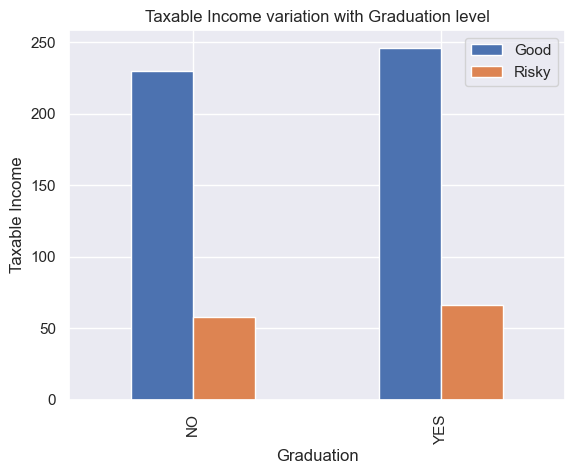

In [15]:
pd.crosstab(data_2['Undergrad'],data_2['Taxable.Income']).plot(kind='bar')
plt.title('Taxable Income variation with Graduation level')
plt.xlabel('Graduation')
plt.ylabel('Taxable Income')
plt.legend(loc='best')

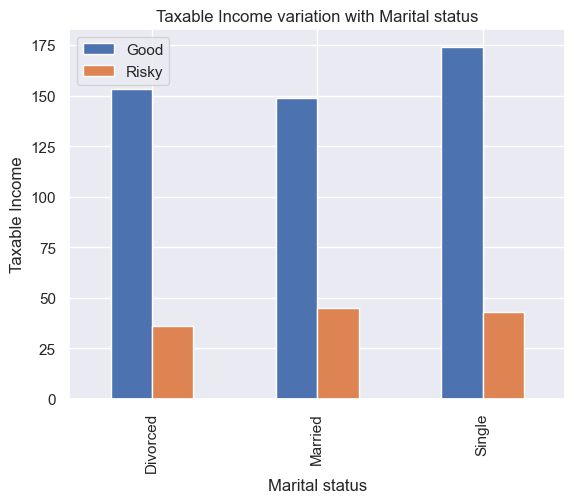

In [16]:
pd.crosstab(data_2['Marital.Status'],data_2['Taxable.Income']).plot(kind='bar')
plt.title('Taxable Income variation with Marital status')
plt.xlabel('Marital status')
plt.ylabel('Taxable Income')
plt.legend(loc='best')

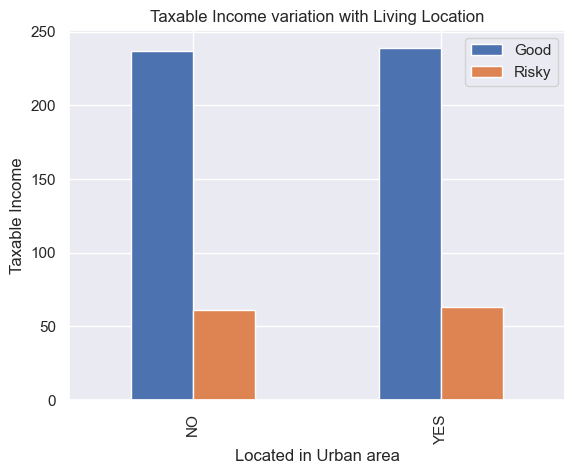

In [17]:
pd.crosstab(data_2['Urban'],data_2['Taxable.Income']).plot(kind='bar')
plt.title('Taxable Income variation with Living Location')
plt.xlabel('Located in Urban area')
plt.ylabel('Taxable Income')
plt.legend(loc='best')

In [18]:
cat_var = pd.get_dummies(data_2[['Undergrad','Urban']])
cat_var

,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,1,0,0,1
1,0,1,0,1
2,1,0,0,1
3,0,1,0,1
4,1,0,1,0
...,...,...,...,...
595,0,1,0,1
596,0,1,0,1
597,1,0,0,1
598,0,1,1,0


In [19]:
from sklearn.preprocessing import OneHotEncoder
 
enc = OneHotEncoder()
enc_data = enc.fit_transform(data_2['Marital.Status'].values.reshape(-1,1)).toarray() 
enc_data_2 = pd.DataFrame(enc_data,columns = enc.get_feature_names_out(['Marital.Status']))
enc_data_2

,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
595,1.0,0.0,0.0
596,1.0,0.0,0.0
597,1.0,0.0,0.0
598,0.0,1.0,0.0


In [20]:
data_3 = pd.concat([data_2,enc_data_2,cat_var],axis=1)
data_3

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,NO,Single,Good,50047,10,YES,0.0,0.0,1.0,1,0,0,1
1,YES,Divorced,Good,134075,18,YES,1.0,0.0,0.0,0,1,0,1
2,NO,Married,Good,160205,30,YES,0.0,1.0,0.0,1,0,0,1
3,YES,Single,Good,193264,15,YES,0.0,0.0,1.0,0,1,0,1
4,NO,Married,Good,27533,28,NO,0.0,1.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES,1.0,0.0,0.0,0,1,0,1
596,YES,Divorced,Good,55369,2,YES,1.0,0.0,0.0,0,1,0,1
597,NO,Divorced,Good,154058,0,YES,1.0,0.0,0.0,1,0,0,1
598,YES,Married,Good,180083,17,NO,0.0,1.0,0.0,0,1,1,0


In [21]:
data_4 = data_3.drop(['Undergrad','Marital.Status','Urban'],axis=1)
data_4

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,Good,50047,10,0.0,0.0,1.0,1,0,0,1
1,Good,134075,18,1.0,0.0,0.0,0,1,0,1
2,Good,160205,30,0.0,1.0,0.0,1,0,0,1
3,Good,193264,15,0.0,0.0,1.0,0,1,0,1
4,Good,27533,28,0.0,1.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,1.0,0.0,0.0,0,1,0,1
596,Good,55369,2,1.0,0.0,0.0,0,1,0,1
597,Good,154058,0,1.0,0.0,0.0,1,0,0,1
598,Good,180083,17,0.0,1.0,0.0,0,1,1,0


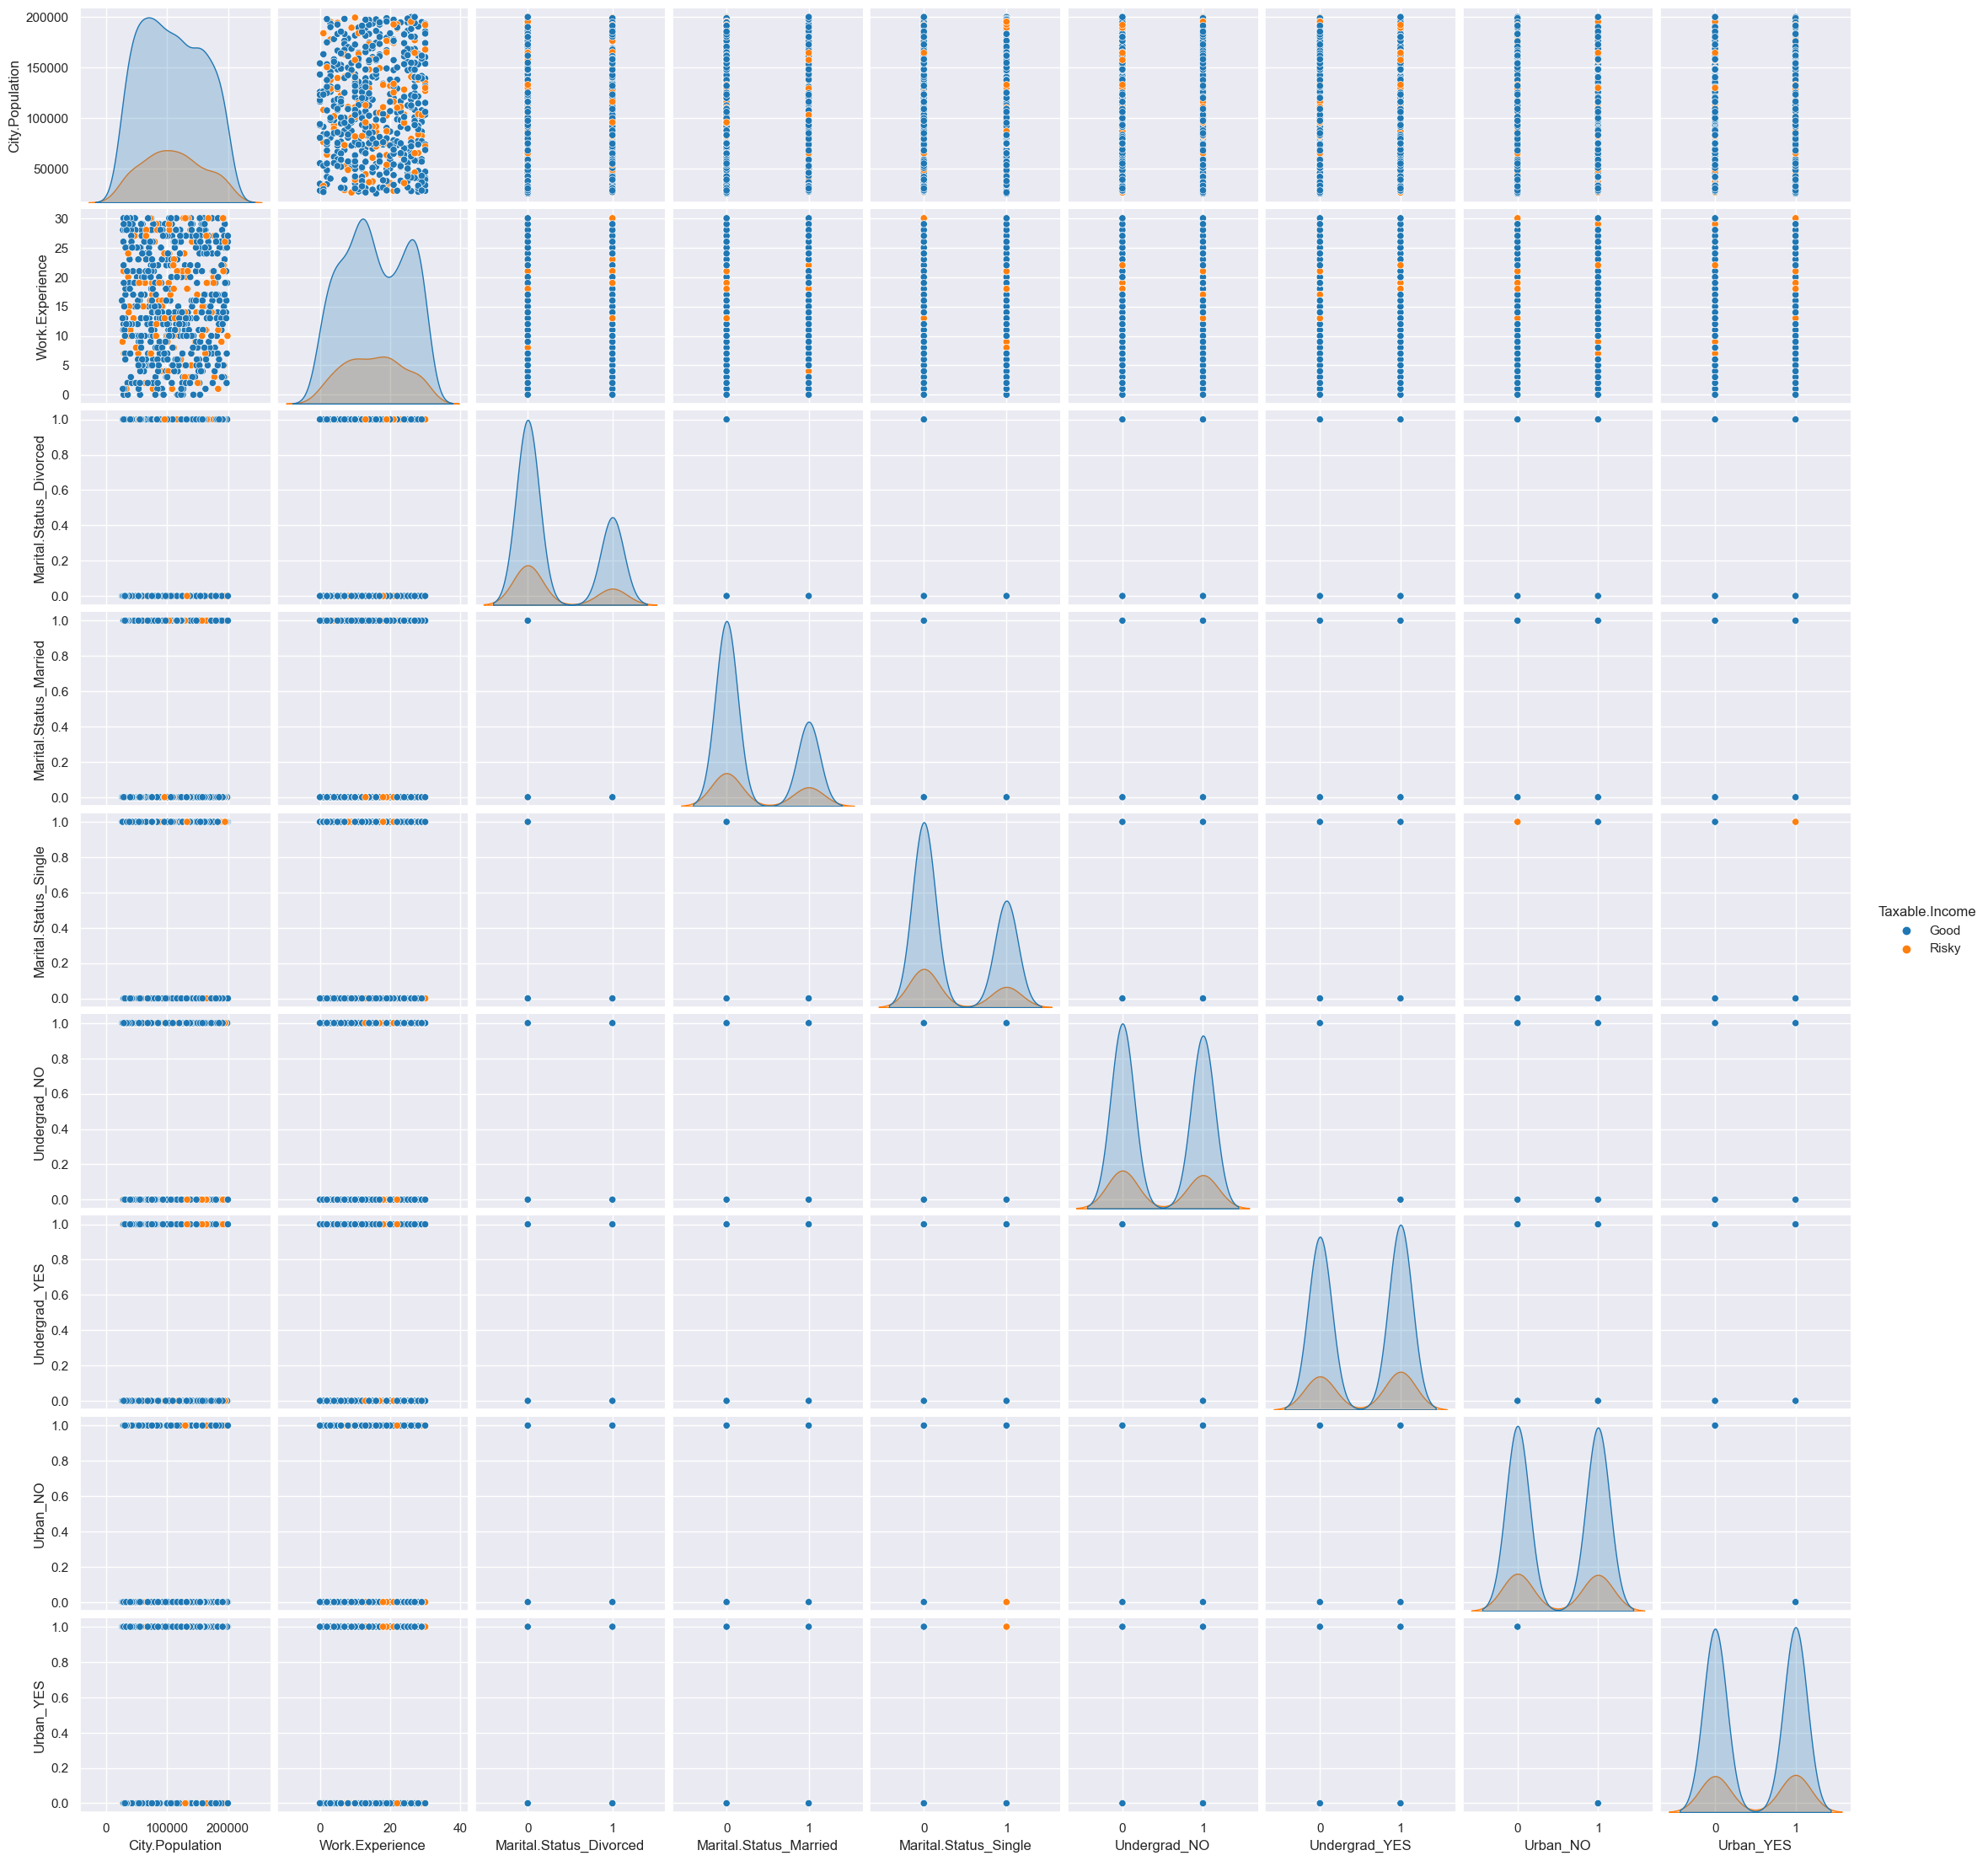

In [22]:
sns.pairplot(data_4,hue='Taxable.Income',palette='tab10')

C:\Users\CSC\AppData\Local\Temp\ipykernel_6628\1570424742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_4.corr(),annot=True,cmap='Paired')


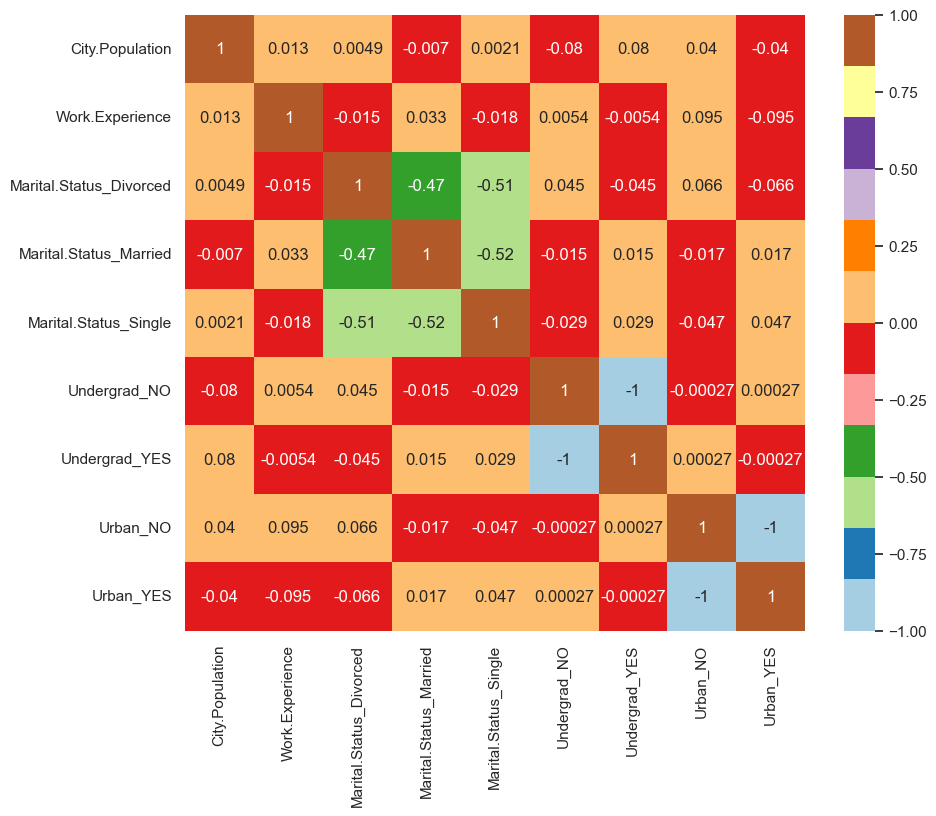

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(data_4.corr(),annot=True,cmap='Paired')
plt.show()

<Axes: xlabel='Taxable.Income', ylabel='count'>

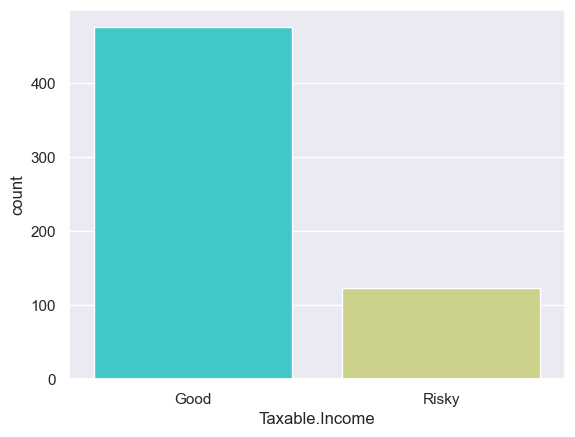

In [24]:
sns.countplot(x=data_4['Taxable.Income'],data=data_4,palette='rainbow')

<b>Data is Highly imbalenced

<b>X and Y

In [25]:
x = data_4.drop(['Taxable.Income'],axis = 1)
y = data_4['Taxable.Income']

<b>DATA TRANSFORMATION

In [26]:
#let us introduce SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x , y)
print(x_smote.shape)
print(y_smote.shape)

(952, 9)
(952,)


In [27]:
#Let us Standardize the data for better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_smote)
x_scaled

array([[-1.17698843, -0.68195533, -0.70194312, ..., -0.90953575,
        -0.82043325,  1.15718034],
       [ 0.51609166,  0.29523597,  1.61421477, ...,  1.09946201,
        -0.82043325,  1.15718034],
       [ 1.042585  ,  1.76102293, -0.70194312, ..., -0.90953575,
        -0.82043325,  1.15718034],
       ...,
       [ 0.44524778,  1.27242728, -0.70194312, ..., -0.90953575,
        -0.82043325, -0.86416954],
       [ 0.44726268,  1.27242728, -0.70194312, ...,  1.09946201,
        -0.82043325, -0.86416954],
       [-1.42097266, -0.19335968,  1.42748304, ...,  1.09946201,
         1.2188682 , -0.86416954]])

<b>MODEL BUILDING

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y_smote,test_size=0.2,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(761, 9)
(191, 9)
(761,)
(191,)


In [30]:
#Entropy criterion
model_1 = RandomForestClassifier(n_estimators=20,criterion='entropy',max_features=7,random_state=15,oob_score=True)

In [31]:
model_1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=7, n_estimators=20,
                       oob_score=True, random_state=15)

In [32]:
y_pred = model_1.predict(x_test)
y_pred

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good'

In [33]:
print(confusion_matrix(y_test,y_pred))

[[78  7]
 [34 72]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.70      0.92      0.79        85
       Risky       0.91      0.68      0.78       106

    accuracy                           0.79       191
   macro avg       0.80      0.80      0.79       191
weighted avg       0.82      0.79      0.78       191



In [35]:
yt = LabelEncoder().fit_transform(y_test)
yp = LabelEncoder().fit_transform(y_pred)

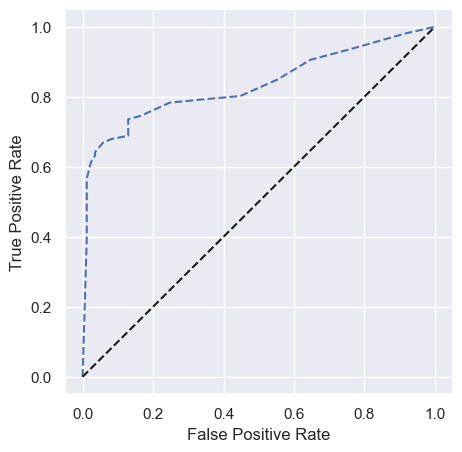

In [36]:
fpr , tpr , threshold = roc_curve(yt,model_1.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
auc

0.7984461709211985

In [38]:
#criterion = gini
model_2 = RandomForestClassifier(n_estimators=20,criterion='gini',max_features=7,oob_score=True,random_state=16)

In [39]:
model_2.fit(x_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=20, oob_score=True,
                       random_state=16)

In [40]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

array(['Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Go

In [41]:
print(confusion_matrix(y_test,y_pred_2))

[[75 10]
 [31 75]]


In [42]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

        Good       0.71      0.88      0.79        85
       Risky       0.88      0.71      0.79       106

    accuracy                           0.79       191
   macro avg       0.79      0.79      0.79       191
weighted avg       0.80      0.79      0.79       191



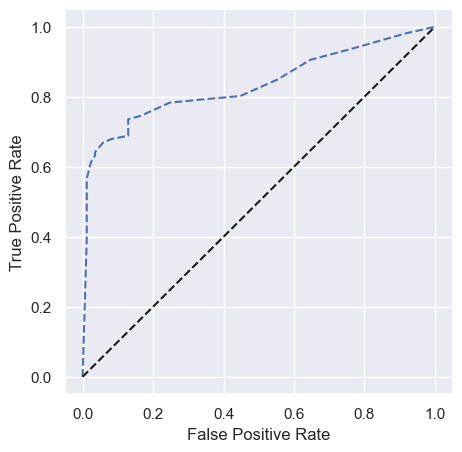

In [43]:
yp2 = LabelEncoder().fit_transform(y_pred_2)
fpr , tpr , threshold = roc_curve(yt,model_1.predict_proba(x_test)[:,1])
auc = roc_auc_score(yt,yp2)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [44]:
auc

0.7949500554938956

<b>Feature engineering

In [45]:
#Let us also build a model using feature engineering-----------new_var = years of exp * Taxable income
data_5 = data_4.copy()
data_5

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,Good,50047,10,0.0,0.0,1.0,1,0,0,1
1,Good,134075,18,1.0,0.0,0.0,0,1,0,1
2,Good,160205,30,0.0,1.0,0.0,1,0,0,1
3,Good,193264,15,0.0,0.0,1.0,0,1,0,1
4,Good,27533,28,0.0,1.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,1.0,0.0,0.0,0,1,0,1
596,Good,55369,2,1.0,0.0,0.0,0,1,0,1
597,Good,154058,0,1.0,0.0,0.0,1,0,0,1
598,Good,180083,17,0.0,1.0,0.0,0,1,1,0


In [46]:
data_5["new_var"] = data['Taxable.Income'] * data['Work.Experience']
data_5

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,new_var
0,Good,50047,10,0.0,0.0,1.0,1,0,0,1,688330
1,Good,134075,18,1.0,0.0,0.0,0,1,0,1,606600
2,Good,160205,30,0.0,1.0,0.0,1,0,0,1,1107750
3,Good,193264,15,0.0,0.0,1.0,0,1,0,1,752850
4,Good,27533,28,0.0,1.0,0.0,1,0,1,0,2268056
...,...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,1.0,0.0,0.0,0,1,0,1,534380
596,Good,55369,2,1.0,0.0,0.0,0,1,0,1,139934
597,Good,154058,0,1.0,0.0,0.0,1,0,0,1,0
598,Good,180083,17,0.0,1.0,0.0,0,1,1,0,1676064


In [47]:
x1 = data_5.drop(['Taxable.Income'],axis=1)
y1 = data_5['Taxable.Income']
print(x1.shape)
print(y1.shape)

(600, 10)
(600,)


In [48]:
#Introducing SMOTE
x1_smote ,y1_smote = smote.fit_resample(x1 , y1)
print(x1_smote.shape)
print(y1_smote.shape)

(952, 10)
(952,)


In [49]:
#Standardizing the data
x1_scaled = scaler.fit_transform(x1_smote)

In [50]:
x1_train , x1_test , y1_train , y1_test = train_test_split(x1_scaled,y1_smote,test_size=0.2,random_state=101)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(761, 10)
(191, 10)
(761,)
(191,)


In [51]:
model_3 = RandomForestClassifier(n_estimators=20,max_features=7,criterion='entropy',oob_score=True,random_state=17)
model_3.fit(x1_train,y1_train)
y_pred_3 = model_3.predict(x1_test)
print('confusion_matrix: ' ,'\n',confusion_matrix(y1_test,y_pred_3))
print('====================================================================================================================')
print('classification_report: ' ,'\n',classification_report(y1_test,y_pred_3)) 

confusion_matrix:  
 [[ 84   1]
 [  2 104]]
classification_report:  
               precision    recall  f1-score   support

        Good       0.98      0.99      0.98        85
       Risky       0.99      0.98      0.99       106

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



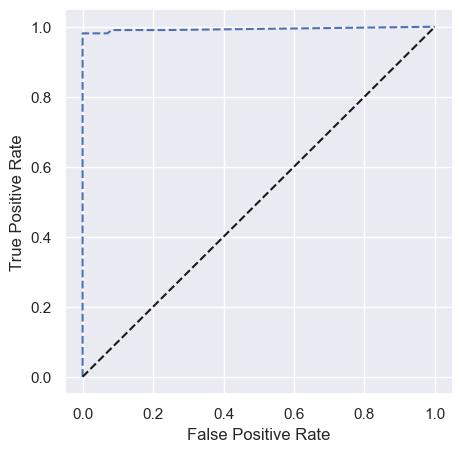

Area Under Curve:  0.9846836847946727


In [97]:
y1t = LabelEncoder().fit_transform(y1_test)
yp3 = LabelEncoder().fit_transform(y_pred_3)
fpr , tpr , threshold = roc_curve(y1t,model_3.predict_proba(x1_test)[:,1])
auc = roc_auc_score(y1t,yp3)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area Under Curve: ",auc)

In [52]:
model_4 = RandomForestClassifier(n_estimators=20,max_features=7,criterion='gini',oob_score=True,random_state=18)
model_4.fit(x1_train,y1_train)
y_pred_4 = model_4.predict(x1_test)
print('confusion_matrix: ' ,'\n',confusion_matrix(y1_test,y_pred_4))
print('====================================================================================================================')
print('classification_report: ' ,'\n',classification_report(y1_test,y_pred_4))

confusion_matrix:  
 [[ 85   0]
 [  2 104]]
classification_report:  
               precision    recall  f1-score   support

        Good       0.98      1.00      0.99        85
       Risky       1.00      0.98      0.99       106

    accuracy                           0.99       191
   macro avg       0.99      0.99      0.99       191
weighted avg       0.99      0.99      0.99       191



D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


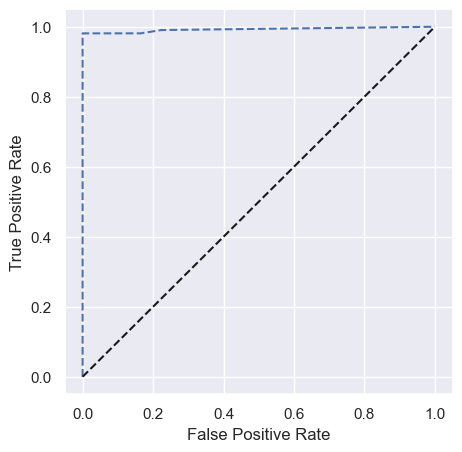

Area Under Curve:  0.9905660377358491


In [96]:
yp4 = LabelEncoder().fit_transform(y_pred_4)
fpr , tpr , threshold = roc_curve(y1t,model_4.predict_proba(x1_test)[:,1])
auc = roc_auc_score(y1t,yp4)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area Under Curve: ",auc)

<b>Hypertuning using GridSearchCV

In [53]:
#Since Feature engineered data has better results, we wil use the same data set.
from sklearn.model_selection import GridSearchCV
model_s = RandomForestClassifier(n_jobs=-1,random_state=42)
param_grid = {'criterion':['entropy','gini'],'max_depth':[2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators':[10,25,30,50,100,200]}
grid_search = GridSearchCV(model_s,param_grid,scoring='accuracy',cv=5,return_train_score=True)

In [54]:
grid_search.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [55]:
grid_search.best_score_

0.9500515995872032

In [56]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [63]:
#Let us build the model using the best estimator from the GridSearchCV
model_5 = RandomForestClassifier(max_depth=10,min_samples_leaf=5,n_estimators=200,n_jobs=-1,random_state=42)
model_5.fit(x1_train,y1_train)
y_pred_5 = model_5.predict(x1_test)
print('confusion_matrix: ' ,'\n',confusion_matrix(y1_test,y_pred_5))
print('====================================================================================================================')
print('classification_report: ' ,'\n',classification_report(y1_test,y_pred_5))

confusion_matrix:  
 [[80  5]
 [ 9 97]]
classification_report:  
               precision    recall  f1-score   support

        Good       0.90      0.94      0.92        85
       Risky       0.95      0.92      0.93       106

    accuracy                           0.93       191
   macro avg       0.92      0.93      0.93       191
weighted avg       0.93      0.93      0.93       191



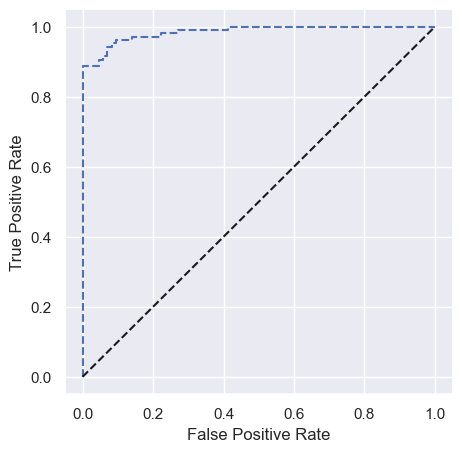

Area Under Curve:  0.9281354051054383


In [95]:
yp5 = LabelEncoder().fit_transform(y_pred_5)
fpr , tpr , threshold = roc_curve(y1t,model_5.predict_proba(x1_test)[:,1])
auc = roc_auc_score(y1t,yp5)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area Under Curve: ",auc)

<b>Finding Optimum numbers of n_estimators

In [72]:
n_estimate_range = range(1,201)
score = []
for n_est in n_estimate_range:
    rf_loop = RandomForestClassifier(n_estimators = n_est , random_state = 12)
    rf_loop.fit(x1_train,y1_train)
    score.append(rf_loop.score(x1_test,y1_test))
score

[0.8691099476439791,
 0.8691099476439791,
 0.9319371727748691,
 0.9267015706806283,
 0.9528795811518325,
 0.93717277486911,
 0.9581151832460733,
 0.9581151832460733,
 0.9581151832460733,
 0.9424083769633508,
 0.9424083769633508,
 0.9581151832460733,
 0.9581151832460733,
 0.9581151832460733,
 0.9528795811518325,
 0.9528795811518325,
 0.9633507853403142,
 0.9633507853403142,
 0.9581151832460733,
 0.9633507853403142,
 0.9528795811518325,
 0.9633507853403142,
 0.9633507853403142,
 0.9581151832460733,
 0.9581151832460733,
 0.9633507853403142,
 0.9581151832460733,
 0.9633507853403142,
 0.9633507853403142,
 0.9633507853403142,
 0.9633507853403142,
 0.9633507853403142,
 0.9476439790575916,
 0.9581151832460733,
 0.9581151832460733,
 0.9633507853403142,
 0.9528795811518325,
 0.9528795811518325,
 0.9528795811518325,
 0.9528795811518325,
 0.9476439790575916,
 0.9476439790575916,
 0.9424083769633508,
 0.9476439790575916,
 0.9424083769633508,
 0.9424083769633508,
 0.9476439790575916,
 0.947643979057

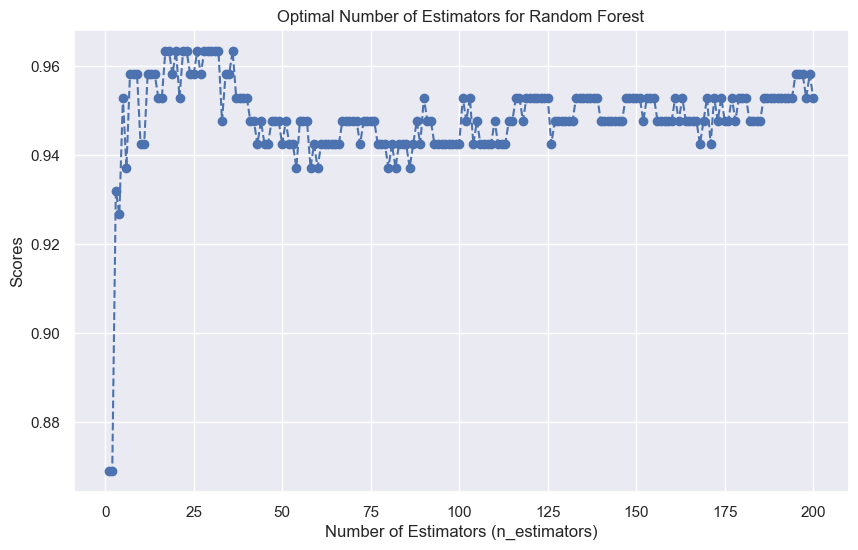

In [73]:
plt.figure(figsize=(10,6))
plt.plot(n_estimate_range,score,marker='o',linestyle='--',color='b')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Scores')
plt.title('Optimal Number of Estimators for Random Forest')
plt.grid(True)
plt.show()

<b>Number of Estimators(trees) are constant between 90 to 100 and also between 185 to 195. Therefore 200 estimators holds good in our case

<b>Hypertuning using RandomSearchCV

In [76]:
from sklearn.model_selection import RandomizedSearchCV
model_s2 = RandomForestClassifier(n_jobs=-1,random_state=43)
param_grid2 = {'criterion':['entropy','gini'],'max_depth':[2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators':[10,25,30,50,100,200]}
random_search = RandomizedSearchCV(model_s2,param_grid2,scoring='accuracy',cv=5,return_train_score=True)

In [77]:
random_search.fit(x1_train,y1_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=43),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': [10, 25, 30, 50, 100,
                                                         200]},
                   return_train_score=True, scoring='accuracy')

In [78]:
random_search.best_score_

0.9211300309597524

In [80]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       n_estimators=25, n_jobs=-1, random_state=43)

In [81]:
#Let us build the model using the best estimator from the RandomizedSearchCV
model_6 = RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_leaf=10,n_estimators=25,n_jobs=-1,random_state=43)
model_6.fit(x1_train,y1_train)
y_pred_6 = model_6.predict(x1_test)
print('confusion_matrix: ' ,'\n',confusion_matrix(y1_test,y_pred_6))
print('====================================================================================================================')
print('classification_report: ' ,'\n',classification_report(y1_test,y_pred_6))

confusion_matrix:  
 [[78  7]
 [11 95]]
classification_report:  
               precision    recall  f1-score   support

        Good       0.88      0.92      0.90        85
       Risky       0.93      0.90      0.91       106

    accuracy                           0.91       191
   macro avg       0.90      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191



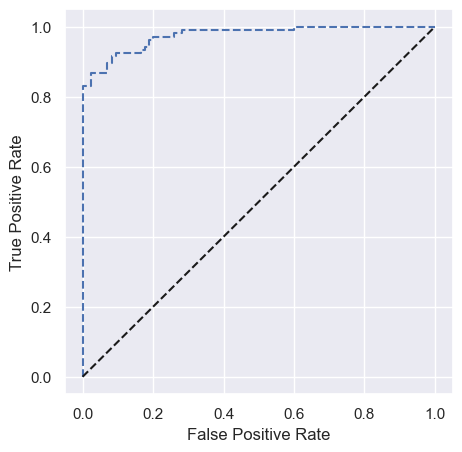

Area Under Curve:  0.9069367369589345


In [94]:
yp6 = LabelEncoder().fit_transform(y_pred_6)
fpr , tpr , threshold = roc_curve(y1t,model_6.predict_proba(x1_test)[:,1])
auc = roc_auc_score(y1t,yp6)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area Under Curve: ",auc)

<b>Random Forest Classifier using KFold Split

In [84]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True,random_state=51)

In [87]:
acc_score = []
for train_index,test_index in kf.split(x1_scaled,y1_smote):
    x2_train,x2_test = x1_scaled[train_index] , x1_scaled[test_index]
    y2_train,y2_test = y1_smote[train_index] , y1_smote[test_index]
    rf = RandomForestClassifier(n_estimators=20,max_features=7,criterion='gini',oob_score=True,random_state=18)
    rf.fit(x2_train,y2_train)
    y_pre = rf.predict(x2_test)
    acc_score.append(accuracy_score(y2_test,y_pre))
acc_score

D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probab

[0.9895833333333334,
 0.9479166666666666,
 0.9368421052631579,
 0.9894736842105263,
 0.9789473684210527,
 0.9894736842105263,
 0.9578947368421052,
 0.9578947368421052,
 0.968421052631579,
 1.0]

In [88]:
np.mean(acc_score)

0.9716447368421053

<b>Random Forest Classifier using KFold Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score
kf2 = KFold(n_splits=10,shuffle=True,random_state=51)
rf2 = RandomForestClassifier(n_estimators=20,max_features=7,criterion='gini',oob_score=True,random_state=18)
result = cross_val_score(rf2,x1_scaled,y1_smote,cv=kf2)
print(np.mean(result))

D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probab

0.9716447368421053


D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\Installation\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<b>Random Forest Classifier using AdaBoostClassifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
rf3 = RandomForestClassifier(n_estimators=20,max_features=7,criterion='gini',oob_score=True,random_state=18)
rf_boost = AdaBoostClassifier(estimator=rf3, n_estimators=2, random_state=22)
rf_boost.fit(x1_train,y1_train)
y_p = rf_boost.predict(x1_test)
print('Confusion_matrix : ','\n',confusion_matrix(y_test,y_p))
print('======================================================================================================')
print('Classification_report : ','\n',classification_report(y_test,y_p))

Confusion_matrix :  
 [[ 84   1]
 [  4 102]]
Classification_report :  
               precision    recall  f1-score   support

        Good       0.95      0.99      0.97        85
       Risky       0.99      0.96      0.98       106

    accuracy                           0.97       191
   macro avg       0.97      0.98      0.97       191
weighted avg       0.97      0.97      0.97       191



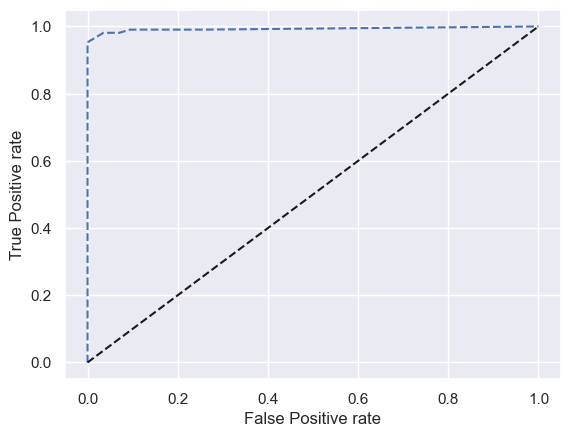

Area Under Curve:  0.9752497225305217


In [100]:
yp_ = LabelEncoder().fit_transform(y_p)
fpr,tpr,threshold = roc_curve(y1t,rf_boost.predict_proba(x1_test)[:,1])
auc = roc_auc_score(y1t,yp_)
plt.plot(fpr,tpr,color='b',linestyle='--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()
print("Area Under Curve: ",auc)

<b>Conclusion
    
<b>Random Forest Classifier with Featured Engineered with Gini has criterion has the best Results of all Models. Hence we can consider it has our final Model